# Data Field Description


1.PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg 
  indicates a group the passenger is travelling with and pp is their number within the group.
  People in a group are often family members, but not always.

2.HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

3.CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the
               duration of the voyage.Passengers in cryosleep are confined to their cabins.

4.Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where 
            side can be either P for Port or S for Starboard.

5.Destination - The planet the passenger will be debarking to.

6.Age - The age of the passenger.

7.VIP - Whether the passenger has paid for special VIP service during the voyage.

8.RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of 
                                                       the Spaceship Titanic's many luxury amenities.

9.Name - The first and last names of the passenger.

10.Transported - Whether the passenger was transported to another dimension. This is the 
                  target, the column you are trying to predict.

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2784]:
train=pd.read_csv(r"G:\LearnBay Machine Learning\Logistic Regression(2)\Speciship_titanic_train.csv")
test=pd.read_csv(r"G:\LearnBay Machine Learning\Logistic Regression(2)\Spaceship_titanic_test.csv")

In [2785]:
# check duplicate 
train.duplicated().sum()

0

In [2786]:
test.duplicated().sum()

0

In [2787]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2788]:
train['Transported']=train['Transported'].astype('int')

In [2789]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [2790]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [2791]:
print(train.shape,test.shape)

(8693, 14) (4277, 13)


In [2792]:
train['data']='train'
test['data']='test'

In [2793]:
all_data=pd.concat([train,test],axis=0)

In [2794]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train


In [2795]:
all_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,test
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,test
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,test
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,test
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN,test


In [2796]:
# Drop Required from the dataset
all_data=all_data.drop(['PassengerId','Name'],axis=1)

In [2797]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,train
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,train
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,train
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,train
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,train


# Information about the Dataset

In [2798]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   float64
 12  data          12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


In [2799]:
all_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,8693.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,0.503624
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


# DATA PREPROCESSING 

**Handling missing value**

In [2800]:
all_data.isnull().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
data               0
dtype: int64

In [2801]:
all_data.isnull().sum()/len(all_data)*100

HomePlanet       2.220509
CryoSleep        2.390131
Cabin            2.305320
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Transported     32.976099
data             0.000000
dtype: float64

In [2802]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,train
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,train
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,train
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,train
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,train


In [2803]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   float64
 12  data          12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


In [2804]:
# Object type column - 'HomePlanet','CryoSleep','Cabin',Destination','VIP'
# target variable - 'Transported'

In [2805]:
all_data['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [2806]:
all_data['HomePlanet']=all_data['HomePlanet'].fillna('Earth')

In [2807]:
all_data['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [2808]:
all_data['CryoSleep']=all_data['CryoSleep'].fillna('False')

In [2809]:
all_data['Cabin'].value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [2810]:
all_data['Cabin']=all_data['Cabin'].fillna('G/734/S')

In [2811]:
all_data['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [2812]:
all_data['Destination']=all_data['Destination'].fillna('TRAPPIST-1e')

In [2813]:
all_data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [2814]:
all_data['VIP']=all_data['VIP'].fillna('False')

In [2815]:
all_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
data               0
dtype: int64

In [2816]:
# Numeric type - 'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'

In [2817]:

# numeric_columns = all_data.select_dtypes(include=['float64', 'int64']).columns

# all_data[numeric_columns]=all_data[numeric_columns].fillna(all_data[numeric_columns]
#                                                            .median())


In [2818]:
all_data['Age']=all_data['Age'].fillna(all_data['Age'].median())

In [2819]:
all_data['RoomService']=all_data['RoomService'].fillna(all_data['RoomService'].median())

In [2820]:
all_data['FoodCourt']=all_data['FoodCourt'].fillna(all_data['FoodCourt'].median())

In [2821]:
all_data['ShoppingMall']=all_data['ShoppingMall'].fillna(all_data['ShoppingMall'].median())

In [2822]:
all_data['Spa']=all_data['Spa'].fillna(all_data['Spa'].median())

In [2823]:
all_data['VRDeck']=all_data['VRDeck'].fillna(all_data['VRDeck'].median())

In [2824]:
all_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
data               0
dtype: int64

In [2825]:
# 'Transported' is traget variable.

# OUTLIER TRATMENT

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


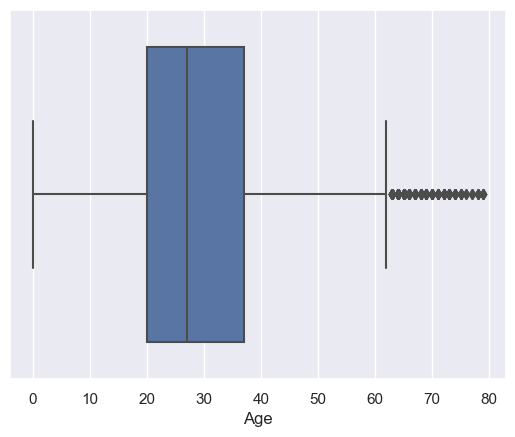

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


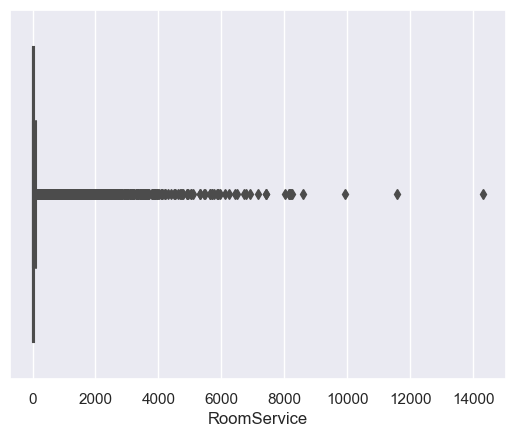

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


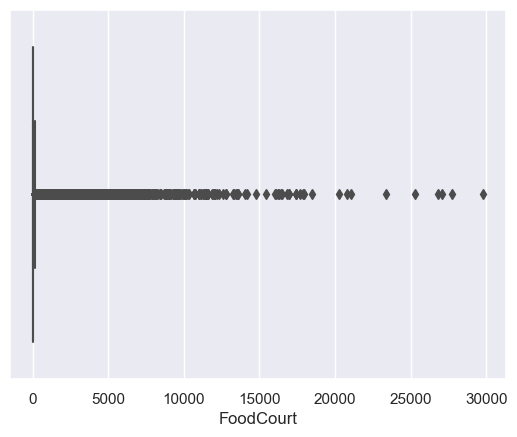

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


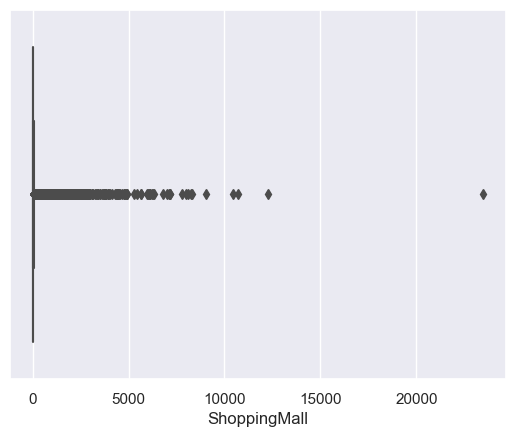

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


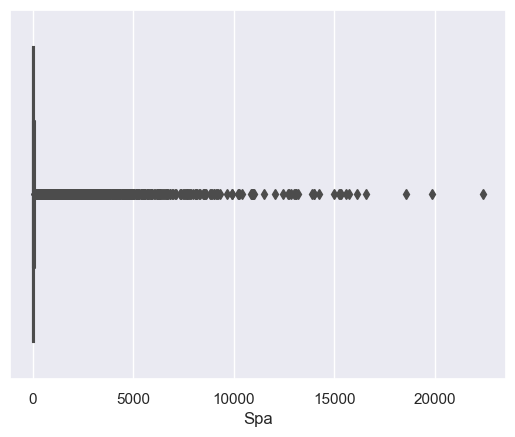

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


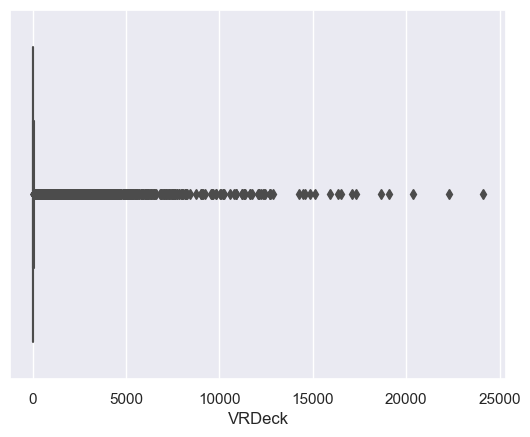

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


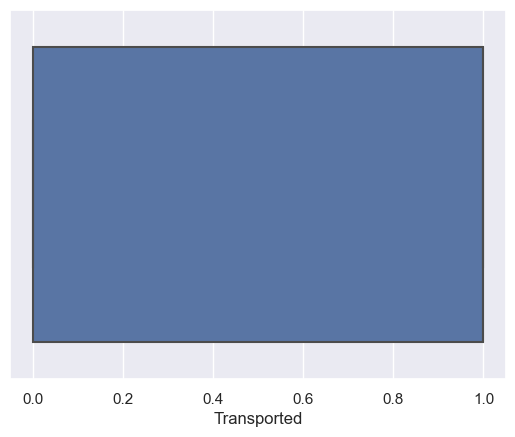

In [2826]:
# check outlier
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for col in all_data.select_dtypes(include=['float64', 'int64']).columns[0:]:
    boxplots(col)

In [2827]:
all_data.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'data'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


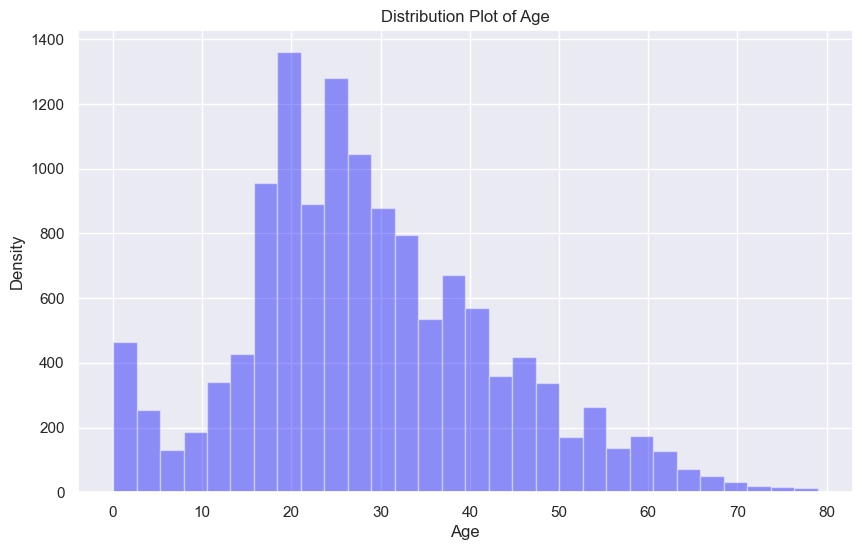

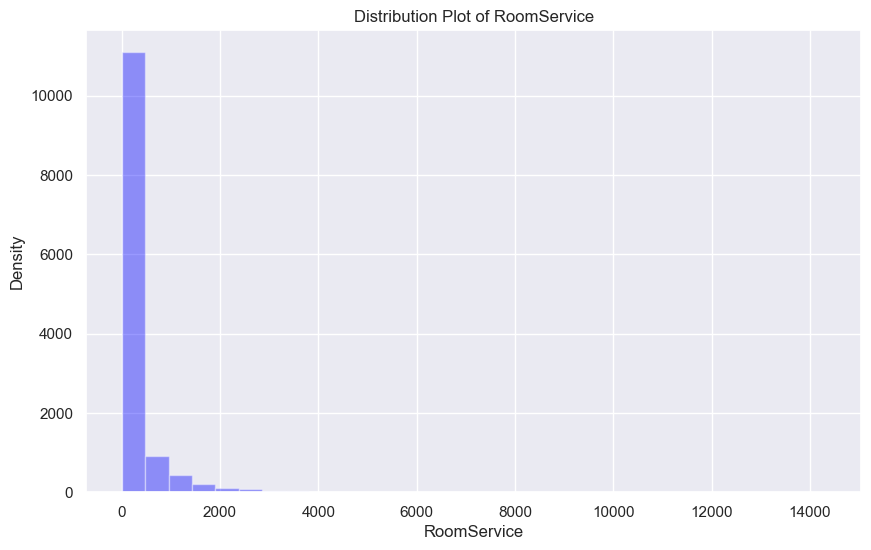

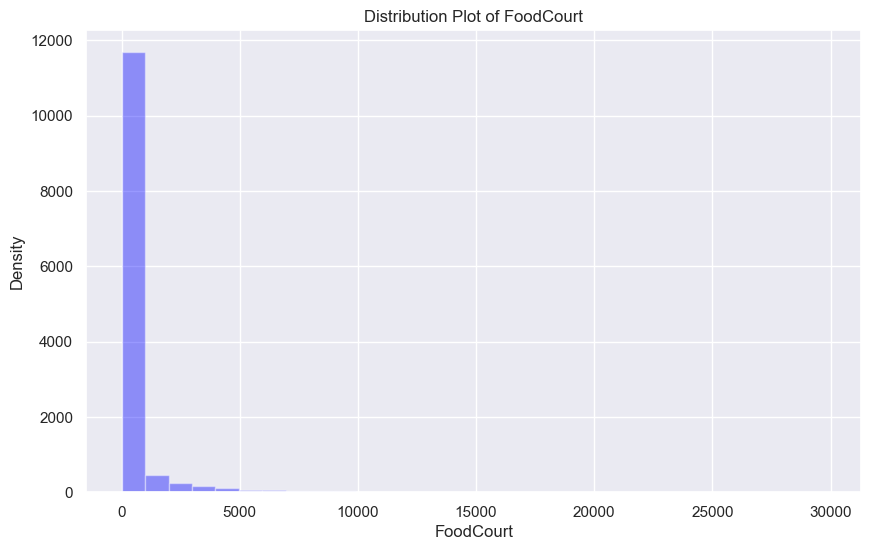

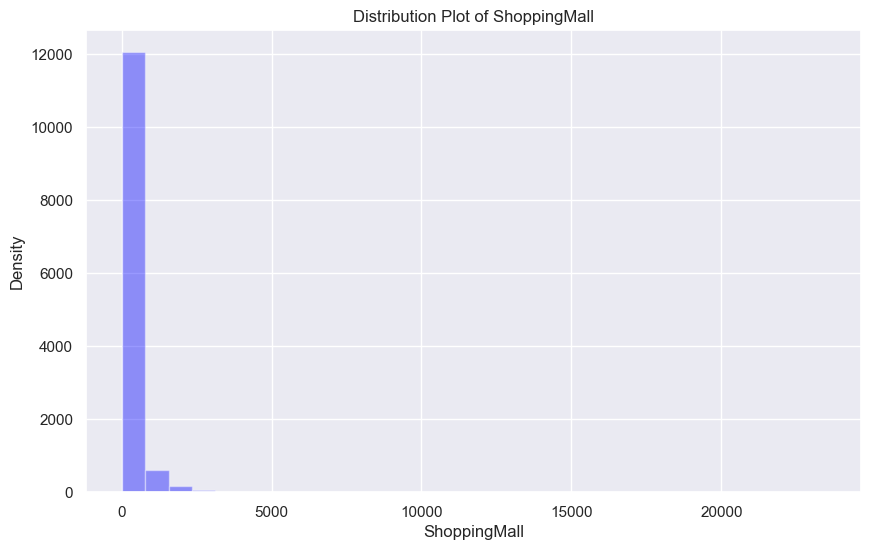

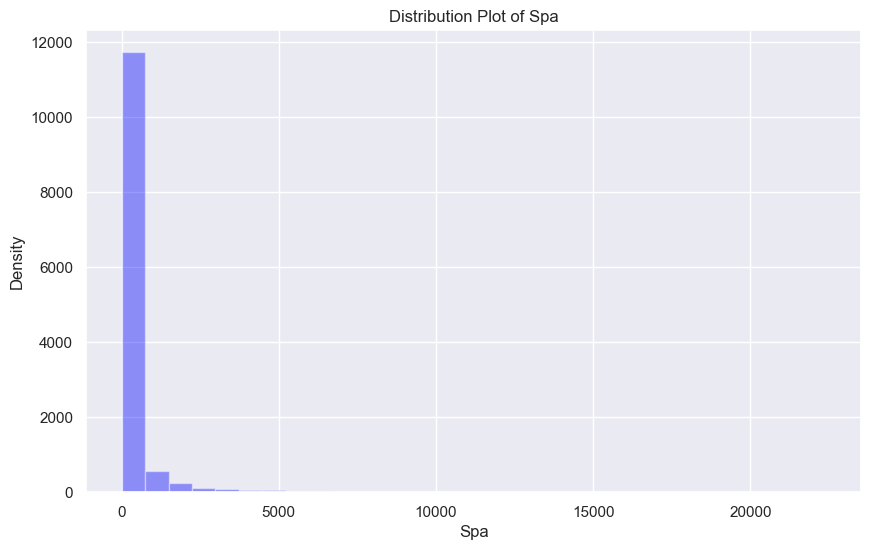

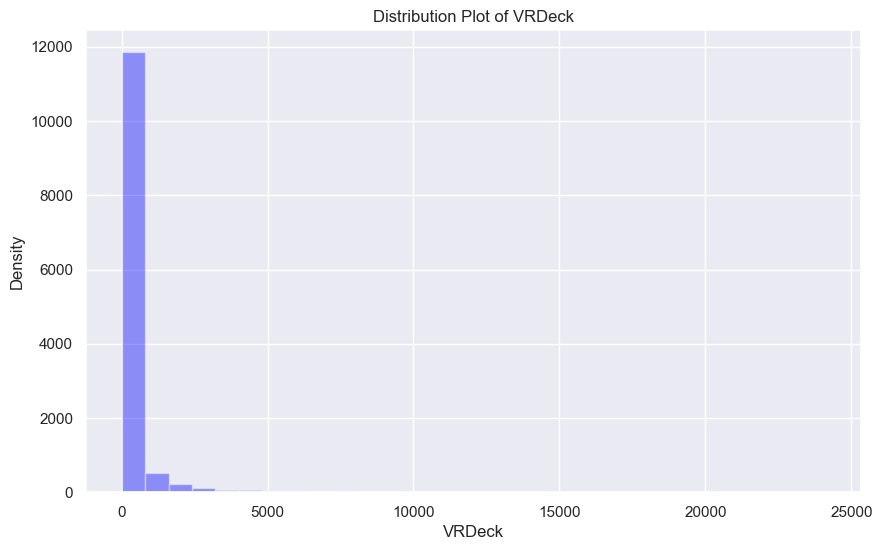

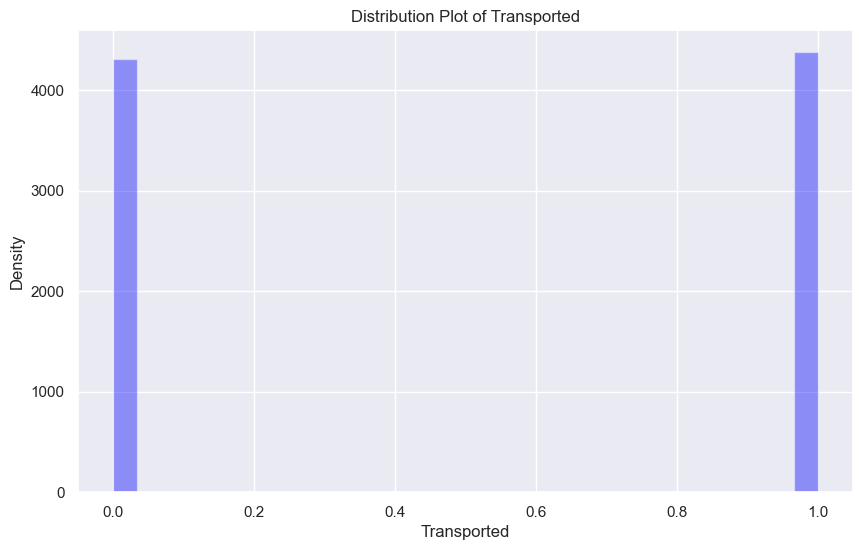

In [2828]:
# Create distribution plots for each numeric column
dist_plot = all_data.select_dtypes(include=['float64', 'int64']).columns

for column in dist_plot:
    plt.figure(figsize=(10, 6))
    sns.distplot(all_data[column], bins=30, kde=False, color='blue')
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [2829]:
age_Q1=all_data['Age'].quantile(0.25)
age_Q3=all_data['Age'].quantile(0.75)
age_iqr=age_Q3 - age_Q1

upper_age = age_Q3 + 1.5*age_iqr
lower_age = age_Q1 + 1.5*age_iqr

all_data['Age']=np.where(all_data['Age']>upper_age,upper_age,
                        np.where(all_data['Age']<lower_age,lower_age,
                                all_data['Age']))

In [2830]:
RoomService_Q1=all_data['RoomService'].quantile(0.25)
RoomService_Q3=all_data['RoomService'].quantile(0.75)
RoomService_iqr=RoomService_Q3 - RoomService_Q1

upper_RoomService = RoomService_Q3 + 1.5*RoomService_iqr
lower_RoomService = RoomService_Q1 - 1.5*RoomService_iqr

all_data['RoomService']=np.where(all_data['RoomService']>upper_RoomService,
                                 upper_RoomService,
                        np.where(all_data['RoomService']<lower_RoomService,
                                 lower_RoomService,
                                all_data['RoomService']))

In [2831]:
FoodCourt_Q1=all_data['FoodCourt'].quantile(0.25)
FoodCourt_Q3=all_data['FoodCourt'].quantile(0.75)
FoodCourt_iqr=FoodCourt_Q3 - FoodCourt_Q1

upper_FoodCourt = FoodCourt_Q3 + 1.5*FoodCourt_iqr
lower_FoodCourt = FoodCourt_Q1 - 1.5*FoodCourt_iqr

all_data['FoodCourt']=np.where(all_data['FoodCourt']>upper_FoodCourt,
                               upper_FoodCourt,
                        np.where(all_data['FoodCourt']<lower_FoodCourt,
                                 lower_FoodCourt,
                                all_data['FoodCourt']))

In [2832]:
ShoppingMall_Q1=all_data['ShoppingMall'].quantile(0.25)
ShoppingMall_Q3=all_data['ShoppingMall'].quantile(0.75)
ShoppingMall_iqr=ShoppingMall_Q3 - ShoppingMall_Q1

upper_ShoppingMall = ShoppingMall_Q3 + 1.5*ShoppingMall_iqr
lower_ShoppingMall = ShoppingMall_Q1 - 1.5*ShoppingMall_iqr

all_data['ShoppingMall']=np.where(all_data['ShoppingMall']>upper_ShoppingMall,
                                  upper_ShoppingMall,
                        np.where(all_data['ShoppingMall']<lower_ShoppingMall,
                                 lower_ShoppingMall,
                                all_data['ShoppingMall']))

In [2833]:
Spa_Q1=all_data['Spa'].quantile(0.25)
Spa_Q3=all_data['Spa'].quantile(0.75)
Spa_iqr=Spa_Q3 - Spa_Q1

upper_Spa = Spa_Q3 + 1.5*Spa_iqr
lower_Spa = Spa_Q1 - 1.5*Spa_iqr

all_data['Spa']=np.where(all_data['Spa']>upper_Spa,upper_Spa,
                        np.where(all_data['Spa']<lower_Spa,lower_Spa,
                                all_data['Spa']))

In [2834]:
VRDeck_Q1=all_data['VRDeck'].quantile(0.25)
VRDeck_Q3=all_data['VRDeck'].quantile(0.75)
VRDeck_iqr=VRDeck_Q3 - VRDeck_Q1

upper_VRDeck = VRDeck_Q3 + 1.5*VRDeck_iqr
lower_VRDeck = VRDeck_Q1 - 1.5*VRDeck_iqr

all_data['VRDeck']=np.where(all_data['VRDeck']>upper_VRDeck,
                            upper_VRDeck,
                        np.where(all_data['VRDeck']<lower_VRDeck,
                                 lower_VRDeck,
                                all_data['VRDeck']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


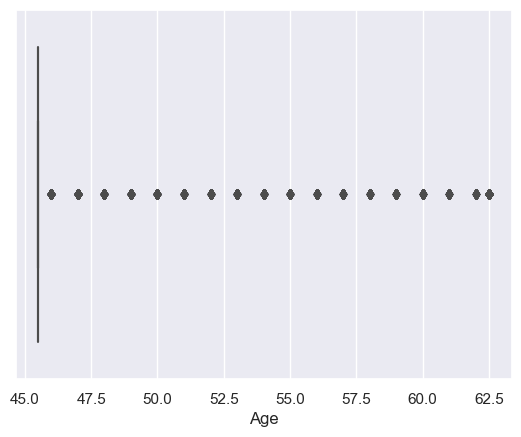

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


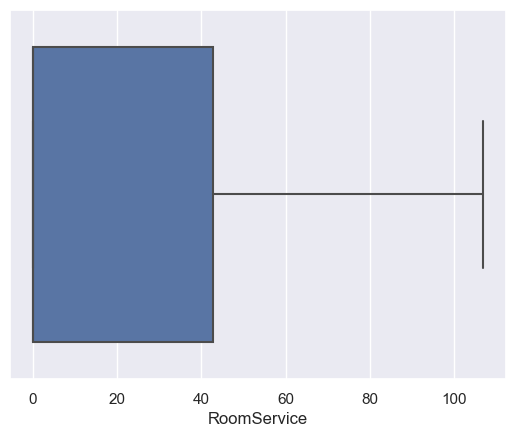

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


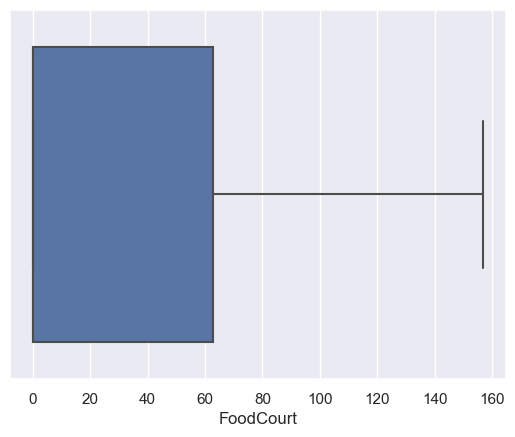

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


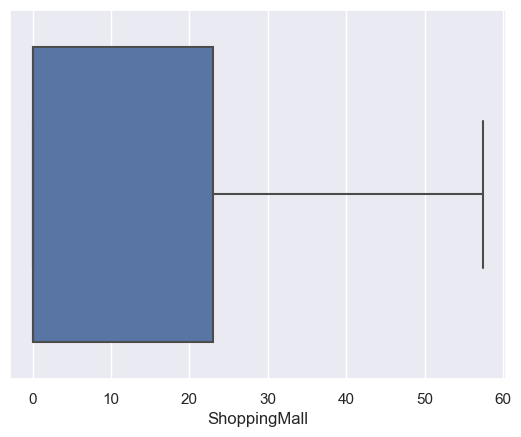

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


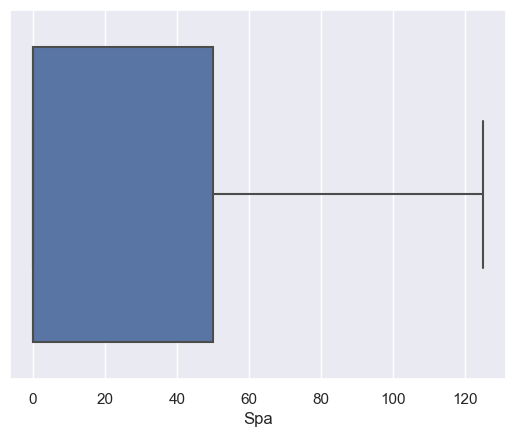

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


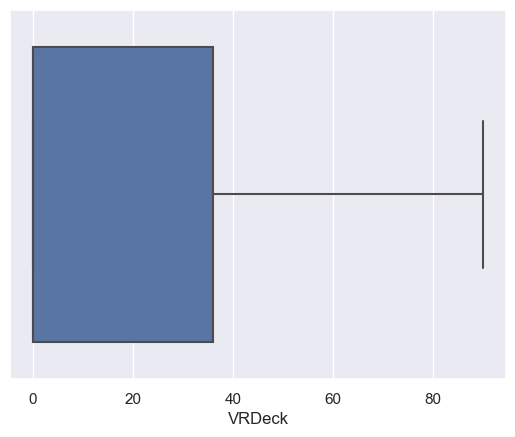

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


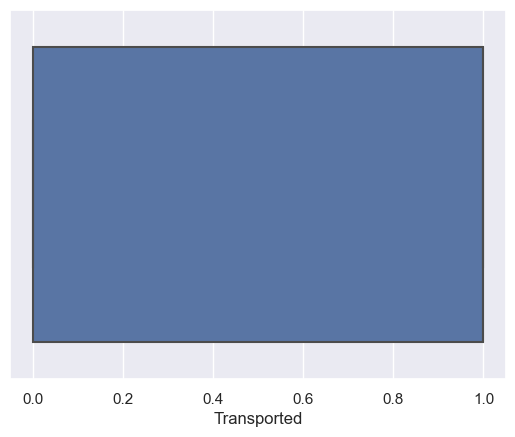

In [2835]:
# check outlier
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for col in all_data.select_dtypes(exclude='object').columns[0:]:
    boxplots(col)

# ENCODING

In [2836]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  object 
 2   Cabin         12970 non-null  object 
 3   Destination   12970 non-null  object 
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  object 
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Transported   8693 non-null   float64
 12  data          12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


In [2837]:
all_data['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [2838]:
# Label encoder
all_data['HomePlanet'] = all_data['HomePlanet'].astype('category')
all_data['HomePlanet'] = all_data['HomePlanet'].cat.codes

In [2839]:
all_data['CryoSleep'].value_counts()

False    8079
True     4581
False     310
Name: CryoSleep, dtype: int64

In [2840]:
# Label encoder
all_data['CryoSleep'] = all_data['CryoSleep'].astype('category')
all_data['CryoSleep'] = all_data['CryoSleep'].cat.codes

In [2841]:
all_data['Destination'].value_counts()

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [2842]:
# Label encoder
all_data['Destination'] = all_data['Destination'].astype('category')
all_data['Destination'] = all_data['Destination'].cat.codes

In [2843]:
all_data['Cabin'].value_counts()

G/734/S     307
G/160/P       8
G/981/S       7
F/1411/P      7
B/82/S        7
           ... 
E/317/P       1
F/1039/P      1
F/1038/P      1
C/158/P       1
G/1498/S      1
Name: Cabin, Length: 9825, dtype: int64

In [2844]:
# Label encoder
all_data['Cabin'] = all_data['Cabin'].astype('category')
all_data['Cabin'] = all_data['Cabin'].cat.codes

In [2845]:
all_data['VIP'].value_counts()

False    12401
False      296
True       273
Name: VIP, dtype: int64

In [2846]:
# Label encoder
all_data['VIP'] = all_data['VIP'].astype('category')
all_data['VIP'] = all_data['VIP'].cat.codes


In [2847]:
# all_data['Transported'].value_counts()

In [2848]:

# # Label encoder
# all_data['Transported'] = all_data['Transported'].astype('category')
# all_data['Transported'] = all_data['Transported'].cat.codes


In [2849]:
all_data['Cabin'].value_counts()

9244    307
7995      8
9777      7
4149      7
821       7
       ... 
2530      1
3332      1
3330      1
985       1
7960      1
Name: Cabin, Length: 9825, dtype: int64

**Anova testing**

In [2850]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2851]:
model=ols('Transported ~ Cabin',data=all_data).fit()
anova_result=sm.stats.anova_lm(model,typ=2)
print(anova_result)


               sum_sq      df          F        PR(>F)
Cabin        6.080216     1.0  24.384773  8.035896e-07
Residual  2167.055640  8691.0        NaN           NaN


In [2852]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int8   
 1   CryoSleep     12970 non-null  int8   
 2   Cabin         12970 non-null  int16  
 3   Destination   12970 non-null  int8   
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  int8   
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Transported   8693 non-null   float64
 12  data          12970 non-null  object 
dtypes: float64(7), int16(1), int8(4), object(1)
memory usage: 987.9+ KB


In [2853]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,1,0,208,2,45.5,0,0.000,0.000,0.0,0.0,0.0,0.0,train
1,0,0,3241,2,45.5,0,106.875,9.000,25.0,125.0,44.0,1.0,train
2,1,0,1,2,58.0,1,43.000,156.875,0.0,125.0,49.0,0.0,train
3,1,0,1,2,45.5,0,0.000,156.875,57.5,125.0,90.0,0.0,train
4,0,0,3243,2,45.5,0,106.875,70.000,57.5,125.0,2.0,1.0,train


# IMBALANCE CHECK

In [2854]:
temp

1.0    8655
0.0    4315
Name: Transported, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


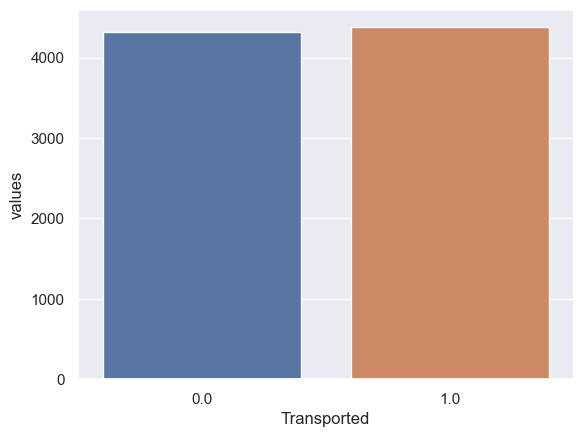

In [2855]:

temp = all_data['Transported'].value_counts()
temp_df = pd.DataFrame({'Transported': temp.index, 'values': temp.values})
print(sns.barplot(x='Transported', y = 'values', data=temp_df))
plt.show()

In [2856]:
all_data['Transported'].value_counts()

1.0    4378
0.0    4315
Name: Transported, dtype: int64

# FINDING CORRELATION

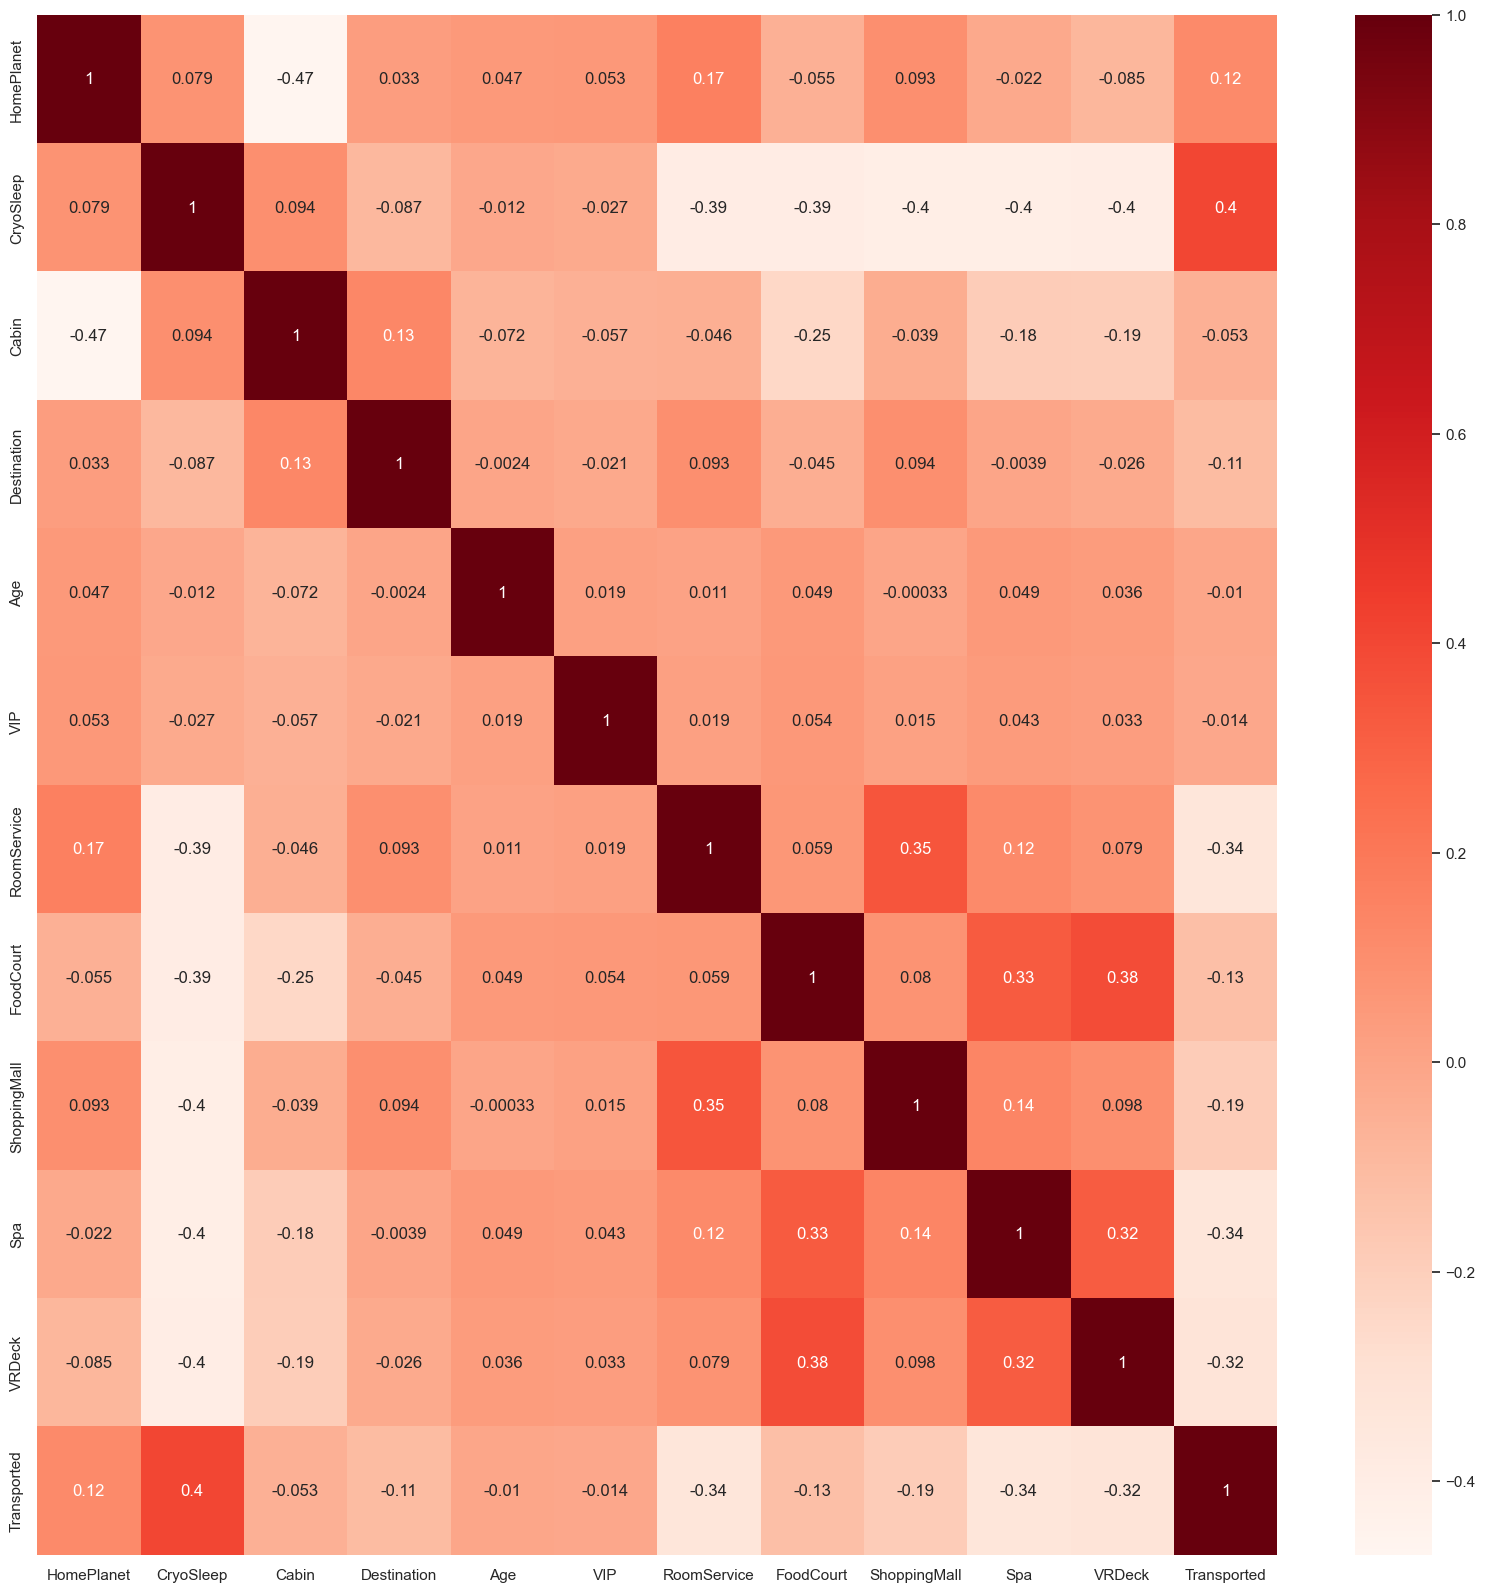

In [2857]:
plt.figure(figsize=(20,20))
sns.heatmap(all_data.corr(), annot=True, cmap='Reds')
plt.show()

**We have to segregate train and test seperately for model and prediction**

In [2858]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,1,0,208,2,45.5,0,0.000,0.000,0.0,0.0,0.0,0.0,train
1,0,0,3241,2,45.5,0,106.875,9.000,25.0,125.0,44.0,1.0,train
2,1,0,1,2,58.0,1,43.000,156.875,0.0,125.0,49.0,0.0,train
3,1,0,1,2,45.5,0,0.000,156.875,57.5,125.0,90.0,0.0,train
4,0,0,3243,2,45.5,0,106.875,70.000,57.5,125.0,2.0,1.0,train


In [2859]:
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [2860]:
print(all_data.shape)
print()
print(train.shape)
print()
print(test.shape)

(12970, 13)

(8693, 13)

(4277, 13)


In [2861]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,1,0,208,2,45.5,0,0.000,0.000,0.0,0.0,0.0,0.0,train
1,0,0,3241,2,45.5,0,106.875,9.000,25.0,125.0,44.0,1.0,train
2,1,0,1,2,58.0,1,43.000,156.875,0.0,125.0,49.0,0.0,train
3,1,0,1,2,45.5,0,0.000,156.875,57.5,125.0,90.0,0.0,train
4,0,0,3243,2,45.5,0,106.875,70.000,57.5,125.0,2.0,1.0,train


In [2862]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
data            0
dtype: int64

In [2863]:
# sns.pairplot(train)

In [2864]:
# split the data into dep and ind variable
x=train.drop(['Transported','data'],axis=1)
y=train[['Transported']]

In [2865]:
x.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,208,2,45.5,0,0.000,0.000,0.0,0.0,0.0
1,0,0,3241,2,45.5,0,106.875,9.000,25.0,125.0,44.0
2,1,0,1,2,58.0,1,43.000,156.875,0.0,125.0,49.0
3,1,0,1,2,45.5,0,0.000,156.875,57.5,125.0,90.0
4,0,0,3243,2,45.5,0,106.875,70.000,57.5,125.0,2.0


In [2866]:
y.head()

,Transported
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [2867]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,0,1,8298,2,45.5,0,0.0,0.000,0.0,0.0,0.0,NaN,test
1,0,0,5564,2,45.5,0,0.0,9.000,0.0,125.0,0.0,NaN,test
2,1,1,856,0,45.5,0,0.0,0.000,0.0,0.0,0.0,NaN,test
3,1,0,858,2,45.5,0,0.0,156.875,0.0,125.0,90.0,NaN,test
4,0,0,5785,2,45.5,0,10.0,0.000,57.5,0.0,0.0,NaN,test


In [2868]:
test.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
data               0
dtype: int64

In [2869]:
test=test.drop(['Transported','data'],axis=1)

In [2870]:
# Test data is for prediction and the ask is same in the case study
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,8298,2,45.5,0,0.0,0.000,0.0,0.0,0.0
1,0,0,5564,2,45.5,0,0.0,9.000,0.0,125.0,0.0
2,1,1,856,0,45.5,0,0.0,0.000,0.0,0.0,0.0
3,1,0,858,2,45.5,0,0.0,156.875,0.0,125.0,90.0
4,0,0,5785,2,45.5,0,10.0,0.000,57.5,0.0,0.0


In [2871]:
y.value_counts()

Transported
1.0            4378
0.0            4315
dtype: int64

In [2872]:
# We have to build model and prediction with x and y dataset 
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=1,
                                                    stratify=y)

# Building Logistic Regression with Binary Class

In [2873]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2874]:
# Predict
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [2875]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 0.])

In [2876]:
y_test

,Transported
2404,1.0
5648,0.0
6007,1.0
2661,1.0
4482,1.0
...,...
3640,0.0
5482,1.0
952,0.0
6462,0.0


In [2877]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2878]:
print(confusion_matrix(y_train, y_pred_train))
print("*********"*5)
print(confusion_matrix(y_test, y_pred_test))

[[2315  921]
 [ 626 2657]]
*********************************************
[[779 300]
 [223 872]]


In [2879]:
print(classification_report(y_train, y_pred_train))
print("*********"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      3236
         1.0       0.74      0.81      0.77      3283

    accuracy                           0.76      6519
   macro avg       0.76      0.76      0.76      6519
weighted avg       0.76      0.76      0.76      6519

*********************************************
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1079
         1.0       0.74      0.80      0.77      1095

    accuracy                           0.76      2174
   macro avg       0.76      0.76      0.76      2174
weighted avg       0.76      0.76      0.76      2174



In [2880]:
print(accuracy_score(y_train, y_pred_train))
print("*********"*5)
print(accuracy_score(y_test, y_pred_test))

0.7626936646724958
*********************************************
0.7594296228150874


# Cross Validation

In [2881]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_model, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Train Accuracy [0.75920245 0.74846626 0.74539877 0.78220859 0.73619632 0.75920245
 0.76380368 0.75766871 0.7898773  0.76804916]

Train Mean Accuracy 0.761007369502323

Train Max Accuracy 0.7898773006134969

Test Accuracy [0.74311927 0.74311927 0.7293578  0.78899083 0.73732719 0.76036866
 0.74654378 0.79262673 0.74654378 0.7281106 ]

Test Mean Accuracy 0.7516107893290491

Test Max Accuracy 0.7926267281105991


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ROC and AUC

In [2882]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7591559070846082

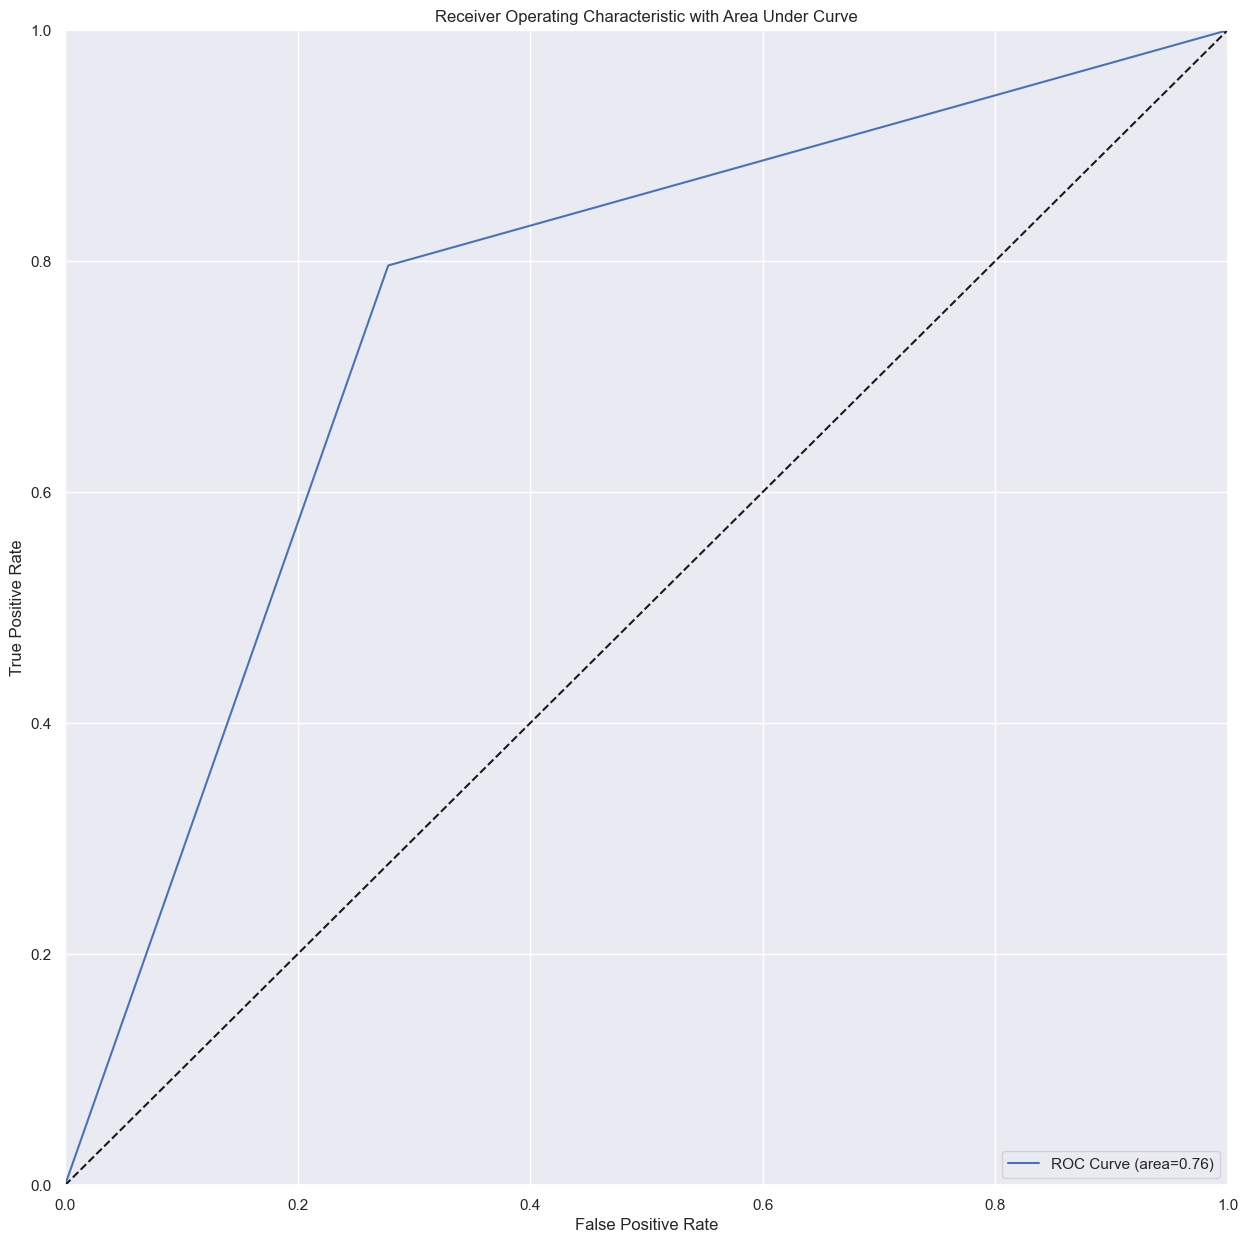

In [2883]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

**Final Part - predict the result for test dataset where we don't have Transported column**

In [2884]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,8298,2,45.5,0,0.0,0.000,0.0,0.0,0.0
1,0,0,5564,2,45.5,0,0.0,9.000,0.0,125.0,0.0
2,1,1,856,0,45.5,0,0.0,0.000,0.0,0.0,0.0
3,1,0,858,2,45.5,0,0.0,156.875,0.0,125.0,90.0
4,0,0,5785,2,45.5,0,10.0,0.000,57.5,0.0,0.0


In [2885]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,1,0,208,2,45.5,0,0.000,0.000,0.0,0.0,0.0,0.0,train
1,0,0,3241,2,45.5,0,106.875,9.000,25.0,125.0,44.0,1.0,train
2,1,0,1,2,58.0,1,43.000,156.875,0.0,125.0,49.0,0.0,train
3,1,0,1,2,45.5,0,0.000,156.875,57.5,125.0,90.0,0.0,train
4,0,0,3243,2,45.5,0,106.875,70.000,57.5,125.0,2.0,1.0,train


In [2886]:
final_result = logit_model.predict(test)

In [2887]:
final_result

array([1., 0., 1., ..., 1., 1., 1.])

In [2888]:
final_result_1 = pd.concat([test,pd.DataFrame(final_result)],axis=1)

In [2889]:
final_result_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,0
0,0,1,8298,2,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
1,0,0,5564,2,45.5,0,0.0,9.000,0.0,125.0,0.0,0.0
2,1,1,856,0,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
3,1,0,858,2,45.5,0,0.0,156.875,0.0,125.0,90.0,0.0
4,0,0,5785,2,45.5,0,10.0,0.000,57.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,7956,2,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
4273,0,0,9244,2,45.5,0,0.0,156.875,17.0,10.0,90.0,0.0
4274,2,1,1905,0,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
4275,1,0,1906,2,45.5,0,0.0,156.875,0.0,0.0,90.0,1.0


In [2890]:
final_result_1=final_result_1.rename(columns={0:"Transported"})

In [2891]:
final_result_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,8298,2,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
1,0,0,5564,2,45.5,0,0.0,9.000,0.0,125.0,0.0,0.0
2,1,1,856,0,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
3,1,0,858,2,45.5,0,0.0,156.875,0.0,125.0,90.0,0.0
4,0,0,5785,2,45.5,0,10.0,0.000,57.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,7956,2,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
4273,0,0,9244,2,45.5,0,0.0,156.875,17.0,10.0,90.0,0.0
4274,2,1,1905,0,45.5,0,0.0,0.000,0.0,0.0,0.0,1.0
4275,1,0,1906,2,45.5,0,0.0,156.875,0.0,0.0,90.0,1.0


In [2900]:
ss = {1.0: 'True', 0.0: 'False'}
final_result_1['Transported'] = final_result_1['Transported'].replace(ss)


In [2901]:
final_result_1

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,8298,2,45.5,0,0.0,0.000,0.0,0.0,0.0,True
1,0,0,5564,2,45.5,0,0.0,9.000,0.0,125.0,0.0,False
2,1,1,856,0,45.5,0,0.0,0.000,0.0,0.0,0.0,True
3,1,0,858,2,45.5,0,0.0,156.875,0.0,125.0,90.0,False
4,0,0,5785,2,45.5,0,10.0,0.000,57.5,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,7956,2,45.5,0,0.0,0.000,0.0,0.0,0.0,True
4273,0,0,9244,2,45.5,0,0.0,156.875,17.0,10.0,90.0,False
4274,2,1,1905,0,45.5,0,0.0,0.000,0.0,0.0,0.0,True
4275,1,0,1906,2,45.5,0,0.0,156.875,0.0,0.0,90.0,True


In [2894]:
final_result_2=final_result_1[['Transported']]

In [2895]:
final_result_2

,Transported
0,True
1,False
2,True
3,False
4,True
...,...
4272,True
4273,False
4274,True
4275,True


In [2896]:
spaceship_titanic_test1 = pd.read_csv(r"G:\LearnBay Machine Learning\Logistic Regression(2)\Spaceship_titanic_test.csv")

In [2897]:
spaceship_titanic_test1.shape

(4277, 13)

In [2898]:
spaceship_test_submission = pd.concat([spaceship_titanic_test1, final_result_2], axis=1)

In [2899]:
spaceship_test_submission

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,True
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,True
